In [38]:

!pip install --upgrade matplotlib
!pip install --upgrade seaborn



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [39]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests
import pandas as pd


In [40]:
#2) Descargar HTML:

#a) Asigno la URL de la página web de la que quiero obtener datos.
url = "https://ycharts.com/companies/TSLA/revenues"

#b) Utilizo la biblioteca "request" para realizar una solicitud HTTP GET a la URL anterior. La respuesta del servidor se almacena en la variable "response".
response = requests.get(url)

#c) Obtengo el código del estado de la respuesta HTTP. Un código igual a "200" indica que la solicitud ha sido exitosa.
response.status_code

"""
CONCLUSIÓN: Obtengo un status_code igual a 403, que significa que no puedo acceder a los datos. Para solventar este problema tengo que usar un "agente de usuario" que simula ser un navegador web.
"""

'\nCONCLUSIÓN: Obtengo un status_code igual a 403, que significa que no puedo acceder a los datos. Para solventar este problema tengo que usar un "agente de usuario" que simula ser un navegador web.\n'

In [41]:
#d) Para solventar el error 403 del status_code anterior uso un "agente de usuario" que simula ser un navegador:
#d1) Asigno la URL de la página web a la variable "url".
url = "https://ycharts.com/companies/TSLA/revenues"

#d2) Defino un diccionario con un encabezado HTTP "User-Agent" que se usa para especificar el agente de usuario que simula a un navegador web.
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

#d3) Utilizo la biblioteca "request" para realizar una solicitud HTTP GET a la URL especificada, utilizando los encabezados definidos. La respuesta del servidor se almacena en la variable "response".
response = requests.get(url, headers=headers)

#d4) Verifico el código de la respuesta. Si el código es 403, imprime un mensaje que indica que el acceso está prohibido. Si el acceso es exitoso, imprime "Aceso exitoso" y el contenido de la respuesta.
if response.status_code == 403:
    print("Error 403: Acceso prohibido. Verifique los permisos y la configuración del servidor.")
else:
    print("Acceso exitoso")
    # Procesa la respuesta
    print(response.content)

"""
CONCLUSIÓN: El acceso es exitoso, por lo que puedo seguir trabajando.
"""

Acceso exitoso
b'\n\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        win

'\nCONCLUSIÓN: El acceso es exitoso, por lo que puedo seguir trabajando.\n'

In [42]:
#3) Transforma el HTML. Para extraer la información se debe transformarla en un objeto estructurado:

#a) Obtengo el contenido de la respuesta HTTP y lo almaceno en la variable "contenido".
contenido = response.content

#b) Utilizo la librería BeautifulSoup para analizar el contenido HTML. La variable "soup" que representa el documento HTML.
    # Nota: BeautifulSoup es una librería de Python para extraer documentos HTML y XML. Esta biblioteca crea un árbol con todos los elementos del documento y puede ser utilizado para extraer información de sitios web.
soup = BeautifulSoup(contenido, 'html.parser')

#c) Imprime el tipo de objeto de la variable "soup", que debería ser <class 'bs4.BeautifulSoup'>
print(type(soup))

# d) Busca todas las etiquetas '<table>' con la clase 'table' en el documento HTML y las almacena en la variable "tablas".
tablas = soup.find_all('table', class_='table')   # Nota: Ver si funciona, creo que no

<class 'bs4.BeautifulSoup'>


In [43]:
#e) Busco todas las etiquetas '<table>' en el documento HTML y las almaceno en la variable "tablas".
tablas = soup.find_all('table')

#f) Imprimo todas las tablas encontradas en el documento HTML.
print(tablas)

[<table class="table">
<thead>
<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>June 30, 2024</td>
<td class="text-right">
                            
                                25.50B
                            
                        </td>
</tr>
<tr>
<td>March 31, 2024</td>
<td class="text-right">
                            
                                21.30B
                            
                        </td>
</tr>
<tr>
<td>December 31, 2023</td>
<td class="text-right">
                            
                                25.17B
                            
                        </td>
</tr>
<tr>
<td>September 30, 2023</td>
<td class="text-right">
                            
                                23.35B
                            
                        </td>
</tr>
<tr>
<td>June 30, 2023</td>
<td class="text-right">
                            
                                24.93B
                       

In [44]:
#f) Calculo el número de tablas encontradas en el documento HTML.
len(tablas)

#g) Imprimo la primera [0] y segunda  [1] tablas encontradas.
print(tablas[0])
print(tablas[1])

<table class="table">
<thead>
<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>June 30, 2024</td>
<td class="text-right">
                            
                                25.50B
                            
                        </td>
</tr>
<tr>
<td>March 31, 2024</td>
<td class="text-right">
                            
                                21.30B
                            
                        </td>
</tr>
<tr>
<td>December 31, 2023</td>
<td class="text-right">
                            
                                25.17B
                            
                        </td>
</tr>
<tr>
<td>September 30, 2023</td>
<td class="text-right">
                            
                                23.35B
                            
                        </td>
</tr>
<tr>
<td>June 30, 2023</td>
<td class="text-right">
                            
                                24.93B
                        

In [45]:
"""
#h) Transformo la tabla para que me quede la fecha y el valor en columnas diferentes.

#h1) Recorro cada celda "td" en la tabla 1. Nota: "enumerate(tablas[1].find_all('td'))" itera sobre todas las celdas, proporcionando el índice y el valor de cada celda.
for i, data in enumerate(tablas[1].find_all('td')):
    #h2) Imprimo las celdas con un índice par.
    if i%2 == 0: 
        print(data)

#h3) Recorro cada celda "td" en la tabla 1. Nota: "enumerate(tablas[0].find_all('td'))" itera sobre todas las celdas, proporcionando el índice y el valor de cada celda.
for i, data in enumerate(tablas[0].find_all('td')):
    #h4) Imprimo las celdas con un índice par.
    if i%2 == 0: 
        print(data)
"""

'\n#h) Transformo la tabla para que me quede la fecha y el valor en columnas diferentes.\n\n#h1) Recorro cada celda "td" en la tabla 1. Nota: "enumerate(tablas[1].find_all(\'td\'))" itera sobre todas las celdas, proporcionando el índice y el valor de cada celda.\nfor i, data in enumerate(tablas[1].find_all(\'td\')):\n    #h2) Imprimo las celdas con un índice par.\n    if i%2 == 0: \n        print(data)\n\n#h3) Recorro cada celda "td" en la tabla 1. Nota: "enumerate(tablas[0].find_all(\'td\'))" itera sobre todas las celdas, proporcionando el índice y el valor de cada celda.\nfor i, data in enumerate(tablas[0].find_all(\'td\')):\n    #h4) Imprimo las celdas con un índice par.\n    if i%2 == 0: \n        print(data)\n'

In [46]:
"""
#i) Desgloso la fecha de cada observación para quedarme con el mes y año.
fecha = 'March 31, 2018'
year = int(fecha.split(' ')[-1])
print(year)

mes = fecha.split(' ')[0]
print(mes)

dia = int(fecha.split(' ')[1].replace(',', ''))
print(dia)

"""


"\n#i) Desgloso la fecha de cada observación para quedarme con el mes y año.\nfecha = 'March 31, 2018'\nyear = int(fecha.split(' ')[-1])\nprint(year)\n\nmes = fecha.split(' ')[0]\nprint(mes)\n\ndia = int(fecha.split(' ')[1].replace(',', ''))\nprint(dia)\n\n"

In [47]:
#4) Proceso el DataFrame. Transformo la tabla para que me quede la fecha y el valor en columnas diferentes.

#a) Creo una lista vacía llamada "data_tabla0" en la que voy a almacenar los datos extraidos de la tabla. Nota: Cada entrada en esta lista será un diccionario que contendrá el mes, año y valor de cada observación de la tabla (No voy a incluir el día porque es irrelevamte para este análisis): 
data_tabla0 = []
#b) Realizo un bucle for para iterar sobre todas las celdas "td" de la tabla 0. Nota: La función "enumerate" se utiliza para obtener el ínidice "i" y el contenido de cada celda "row". Por otro lado, "(tablas[0].find_all('td'))" encuentra todas las celdas "td" en la tabla 0.
for i, row in enumerate(tablas[0].find_all('td')):
    #c) Selecciono sólo las celdas con índices pares. Nota: El supuesto consiste en que las celdas pares contienen las fechas y las impares los valores de la tabla 0.
    if i % 2 == 0:
        #c) Si la celda tiene un índice par, el código extrae el texto de la celda que contiene la fecha y lo guarda en la variable "fecha". Nota: La función "get_text(strip=True)" extrae el taxto de la celda y elimina cualquier espacio en blanco adicional al principio o al final del texto.
        fecha = row.get_text(strip=True)
        #e) Extraigo el valor correspondiente de cada observación (índice i+1) y lo guardo en en la variable "valor". Nota: "i+1" indica que se accede a la celda siguiente en la tabla (que tiene un "indice impar") para obtener el valor.
        valor = tablas[0].find_all('td')[i+1].get_text(strip=True)
            
        #f) Descompongo la fecha en mes, día y año(Ejemplo:'March 31, 2018'). Nota: La función "fecha.split(' ')" divide la cadena "fecha" en partes usando el espacio como delimitador.
        #f.1) Tomo la última parte de la fecha (año) y la convierto en un entero.
        year = int(fecha.split(' ')[-1])
        #f.2) Tomo la primera parte de la fecha (mes)
        mes = fecha.split(' ')[0]
        #f.3) Tomo la segunda parte de la fecha (día), elimino la coma y convierto el dato en un entero.
        dia = int(fecha.split(' ')[1].replace(',', ''))

        #g) Limpio el valor eliminando $ y comas para que luego no tenga problemas al convertir la variable en un número flotante.
        valor_limpio = valor.replace('$', '').replace(',', '').strip()

        #h) Convierto el dato de la variable "valor" a float. Nota: Para ello tengo que eliminar el sufijo "M" o "B", y multiplicar el número por 1e6 (millón) o 1e9 (billón). Convierto el valor limpio a un número float antes de almacenarlo en "data" (IMPORTANTE: Para poder realizar posteriormente operaciones numéricas).
        if valor_limpio.endswith('M'):
            valor_limpio = float(valor_limpio[:-1]) * 1e6
        elif valor_limpio.endswith('B'):
            valor_limpio = float(valor_limpio[:-1]) * 1e9
        else:
            valor_limpio = float(valor_limpio)
        
        #i) Guardo en la lista "data" solo si el valor es válido. 
        data_tabla0.append({'Mes': mes, 'Año': year, 'Valor': (valor_limpio)})

#j) Converto la lista en un DataFrame para la tabla 0.
df_tabla0 = pd.DataFrame(data_tabla0)

#k) Creo una lista vacía llamada "data_tabla1" en la que voy a almacenar los datos extraidos de la tabla. Nota: Cada entrada en esta lista será un diccionario que contendrá el mes, año y valor de cada observación de la tabla (No voy a incluir el día porque es irrelevamte para este análisis): 
data_tabla1 = []
for i, row in enumerate(tablas[1].find_all('td')):
    if i % 2 == 0:
        fecha = row.get_text(strip=True)
        valor = tablas[1].find_all('td')[i+1].get_text(strip=True)
        
        year = int(fecha.split(' ')[-1])
        mes = fecha.split(' ')[0]
        dia = int(fecha.split(' ')[1].replace(',', ''))
        
        valor_limpio = valor.replace('$', '').replace(',', '').strip()
        
        if valor_limpio.endswith('M'):
            valor_limpio = float(valor_limpio[:-1]) * 1e6
        elif valor_limpio.endswith('B'):
            valor_limpio = float(valor_limpio[:-1]) * 1e9
        else:
            valor_limpio = float(valor_limpio)
        
        data_tabla1.append({'Mes': mes, 'Año': year, 'Valor': (valor_limpio)})

#l) Converto la lista en un DataFrame para la tabla 1.
df_tabla1 = pd.DataFrame(data_tabla1)

#m) Combino ambos DataFrames.
df_combinado = pd.concat([df_tabla0, df_tabla1]).reset_index(drop=True)

#k) Elimino las filas que tengan valores faltantes (NAN).
df_combinado.dropna(inplace=True)

#l) Visualizo el DataFrame y lo guardo en un archivo CSV.
print(df_combinado.head())
print(df_combinado.tail())

df_combinado.to_csv('df_webscraping.csv', index=False)


         Mes   Año         Valor
0       June  2024  2.550000e+10
1      March  2024  2.130000e+10
2   December  2023  2.517000e+10
3  September  2023  2.335000e+10
4       June  2023  2.493000e+10
          Mes   Año        Valor
45      March  2013  561790000.0
46   December  2012  306330000.0
47  September  2012   50100000.0
48       June  2012   26650000.0
49      March  2012   30170000.0


In [48]:
#5) Almacenar los datos en SQlite. Nota: SQlite3 es una biblioteca estándar de Python para interactuar con BD SQlite.

#a) Creo la BD. Nota: Como el archivo "revenues.db" no esite, se crea automáticamente. "sqlite3.connect" establece una conexión con una BD SQLite.
conn = sqlite3.connect('revenues.db')

#b) Creo un cursos para interactuar con la BD. Nota: Un cursos permite ejecutar comandos SQL en la BD. Es como un controlador que te permite navegar y ejecutar comandos en la BD.
cursor = conn.cursor()

#c) Creo la tabla en la que voy a almacenar todos los datos. 
    # Nota: "cursor.execute" ejecuta una sentencia SQL, en este caso la utilizo para crear una tabla en la BD. 
    # "CREATE TABLE IF NOT EXISTS revenue_data (...)" Crea una tabla llamada "revenue_data. Si ya existe la tabla este comando no hace nada".
    # id INTEGER PRIMARY KEY AUTOINCREMENT: Crea una columna "id" que es un número entero (INTEGER), se utiliza como clave primaria (PRIMARY KEY), y se incrementa automáticamente (AUTOINCREMENT) para cada fila insertada.
    # Mes TEXT: Crea una columna llamada "Mes" que va almacenar los valores de texto "TEXT" con los nombres de los meses.
    # Año INTERGER: Crea una columna llamada "Año" que va a almacenar los valores enteros con los años.
    # Valor REAL: Crea una columna llamada "Valor" para almazenar los ingresos como un nñumero de punto flotante (REAL), que puede tener decimales.
cursor.execute('''
    CREATE TABLE IF NOT EXISTS revenue_data (       
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Mes TEXT,
        Año INTEGER,
        Valor REAL
    )
''')

#d) Inserto los valores en la tabla.
    # for _, row in df.iterrows(): Creo un bucle "for" que itera sobre cada fila en el DataFram (df).
       # df.iterrows(): Devuelve pares de índices y filar. Row es una serie de pandas que contiene los datos de una fila.
       # Se usa "_" para ignorar el índice porque no es necesario en este caso.
for _, row in df_combinado.iterrows():
    # Inserto una nueva fila en la tabla "revenue_data".
       # INSERT INTO revenue_data (Mes, Año, Valor): Especifico las columnas en las que quiero insertar datos.
       # VALUES (?, ?, ?): Especifico los valores a insertar. Los signos de interrogación son marcadores de posición que serán reemplazados por los valores de la fila actual.
       # (row['Mes'], row['Año'], row['Valor']): Inserto en las columnas de la tabla los valores extraidos de las fila actual del DataFrame.
    cursor.execute('''
        INSERT INTO revenue_data (Mes, Año, Valor) 
        VALUES (?, ?, ?)
    ''', (row['Mes'], row['Año'], row['Valor']))

#e) Almaceno los cambios (commit). Nota: Importantísimo hacerlo porque los datos se perderán si la conexión se cierra y no se ha hecho "commit".
conn.commit()

#f) Verifico que he insertado los datos correctamente.
#f1) Ejecuto una consulta SQL para la seleccionar todas las columnas ("*") de la tabla "revenue_data", pero limitando el resultado a las 5 primeras filas ("LIMIT 5").
cursor.execute('SELECT * FROM revenue_data LIMIT 5')
#f2) Recupero todas las filas que coinciden con la consulta anterior y las devuelve como una lista de tuplas.
rows = cursor.fetchall()
#f3) Itero sobre las filas recuperadas e imprimo una por una. Nota: Cada "row" es una tupla que contiene los valores de una fila en la tabla.
for row in rows:
    print(row)       #Está correcto.

#g) Cierro la conexión.
conn.close()


(1, 'June', 2024, 25500000000.0)
(2, 'March', 2024, 21300000000.0)
(3, 'December', 2023, 25170000000.0)
(4, 'September', 2023, 23350000000.0)
(5, 'June', 2023, 24930000000.0)


In [49]:
#h) Ordeno el DataFrame con fechas ascendentes.
df_combinado['Fecha'] = pd.to_datetime(df_combinado['Año'].astype(str) + '-' + df_combinado['Mes'], format='%Y-%b')

df_combinado = df_combinado.sort_values(by='Fecha', ascending=True).reset_index(drop=True)

#i) Mostrar el DataFrame ordenado
print(df_combinado.head())


ValueError: unconverted data remains when parsing with format "%Y-%b": "e", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

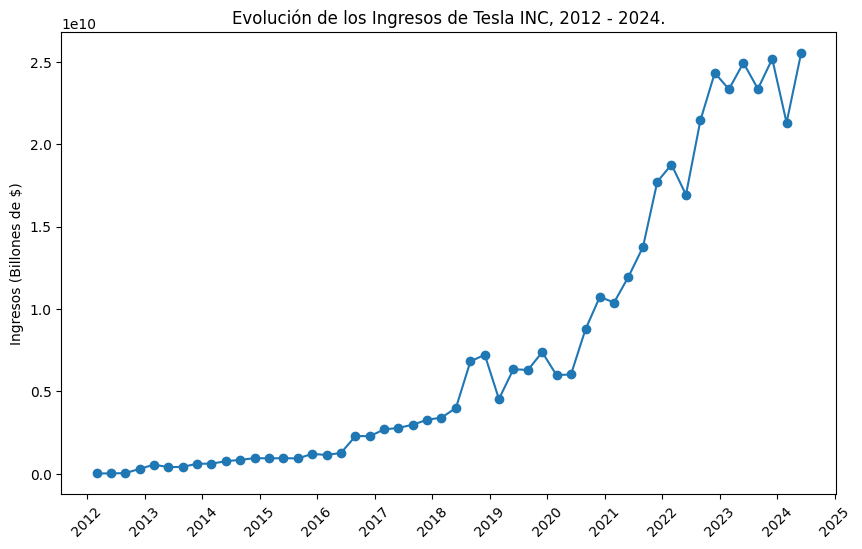

In [ ]:
#6) Visualización de los datos.

#a) Creo el gráfico de líneas:
plt.figure(figsize=(10, 6))
plt.plot(df_combinado['Fecha'], df_combinado['Valor'], marker='o')

# Nota: Ajusto las fechas en el eje x para mostrar solo el año.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Nota: Coloca una etiqueta cada año.
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  

plt.title('Evolución de los Ingresos de Tesla INC, 2012 - 2024.')
plt.ylabel('Ingresos (Billones de $)')
plt.xticks(rotation=45)
plt.show()


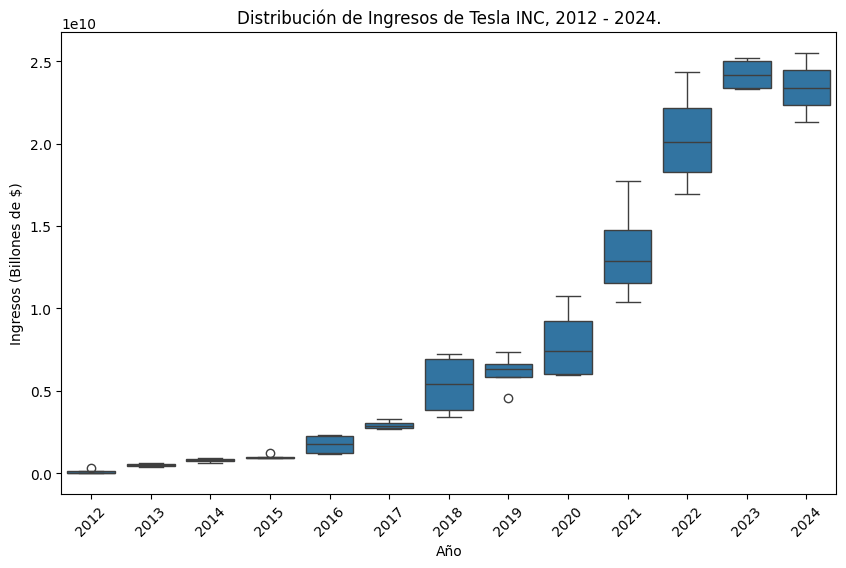

In [ ]:
#b) Gráfico de caja.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', y='Valor', data=df_combinado)

plt.title('Distribución de Ingresos de Tesla INC, 2012 - 2024.')
plt.ylabel('Ingresos (Billones de $)')
plt.xticks(rotation=45)
plt.show()

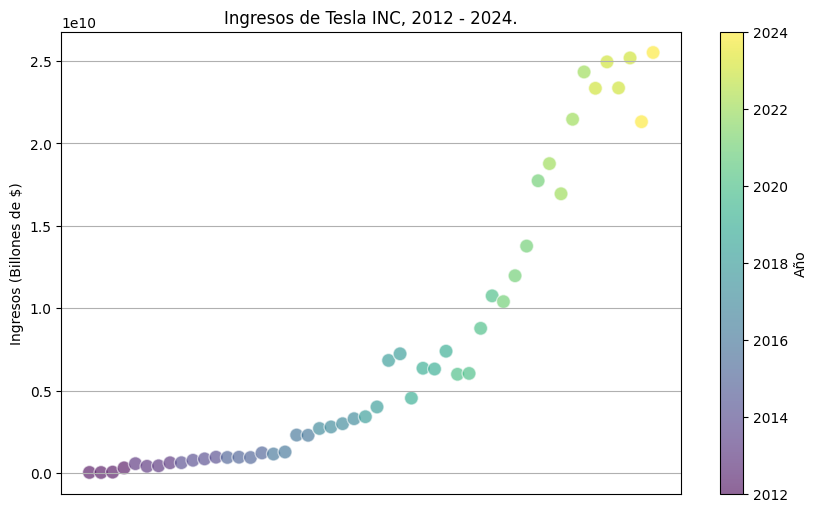

In [ ]:
#c) Gráfico de dispersión con escala de colores para los años:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_combinado['Fecha'], df_combinado['Valor'], c=df_combinado['Año'], cmap='viridis', alpha=0.6, edgecolor='w', s=100)

plt.colorbar(scatter, label='Año')
plt.title('Ingresos de Tesla INC, 2012 - 2024.')
plt.ylabel('Ingresos (Billones de $)')

# Elimino las etiquetas del eje x.
plt.xticks([])

plt.grid(True)
plt.show()
